# 6. 지도 학습: 분류
- 회귀: 목표 데이터가 연속된 수치
- 분류: 목표 데이터가 클래스(class)

## 6.1 1차원 입력 2클래스 분류

### 6.1.1 문제 설정

- 1차원의 입력 변수: $x_n$
- 목표 변수(target variable): $t_n$
- $n$: 데이터의 인덱스

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed=0) # 난수 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ["cornflowerblue", "gray"]
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 #클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk<Pi) + 1 * (wk>=Pi) # (A) 수컷과 암컷을 확률적으로 결정
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B) 암컷일 시 Dist_s[0] = 0.4 ~ Dist_w[0] = 0.8의 균일한 분포에서 질량 샘플링
                                                          #     수컷일 시 Dist_s[0] = 0.8 ~ Dist_w[0] = 1.6의 균일한 분포에서 질량 샘플링

# 데이터 표시
print("X=" + str(np.round(X, 2)))
print("T=" + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


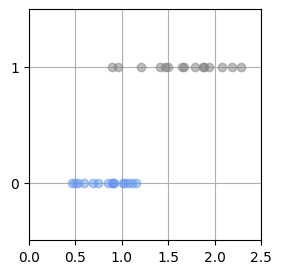

In [ ]:
# 데이터 분포 표시
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha = 0.5, linestyle = "none", marker = "o") # (B) 분포 표시
        plt.grid(True)
        plt.ylim(-0.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])

# 메인
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

- 결정 경계(decision boundary): 수컷과 암컷을 분리하는 경계선 결정
- 어떻게?
    - 선형 회귀 모델 사용 (잘 통하지 않음)
    - 설명은 아래 그림 참조
    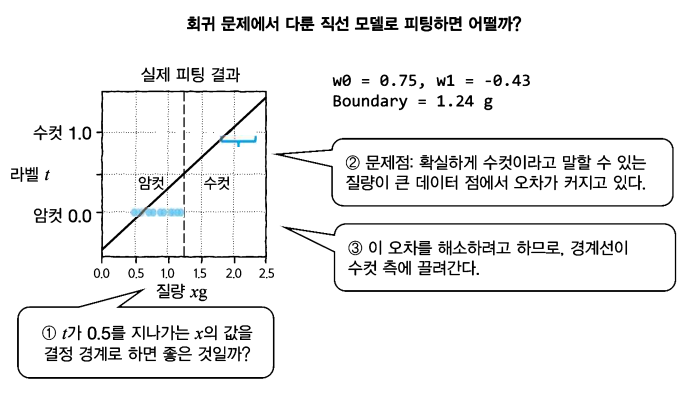

### 6.1.2 확률로 나타내는 클래스 분류
- $x$에 대해서 $t=1$(수컷)일 확률은 조건부 확률을 사용해서 표현
$$ P(t=1|x) $$
- 어떤 클래스로 분류되는지 명확하지 않은 영역 > 확률적인 예측으로 표현
- 결론: **확률로 나타내는 것이 나음**

### 6.1.3 최대가능도법
- $0.8<x\leq1.2$의 범위에 있는 $t$
- 처음 3회는 $t=0$, 4회는 $t=1$이라고 가정
$$ P(t=1|x)=w$$
- 설명: 확률 $w$에서 $t=1$을 생성하는 모델

최대가능도법을 사용해서 $w$를 예측 시
- 가능도: 모델에서 클래스 데이터 $\mathbf{w}=0, 0, 0, 1$이 생성될 확률
- $w=0.1$이라고 가정할 때
    - 가능도: $0.9\times0.9\times0.9\times0.1 = 0.0729$
- $w=0.2$라고 가정할 때
    - 가능도: $0.8×0.8×0.8×0.2 = 0.1024$
- 0과 1 사이 가능도가 가장 높아지는 $w$
    - $P(\mathbf{T}=0, 0, 0, 1|x) = (1-w)^3w$

**최대치를 갖는 $w$를 찾기** <br>
위의 식의 양변에 로그를 취하면
$$\log P = \log{\{(1-w)^3w\}} = 3\log{(1-w)} + \log w $$
$\log P$를 최대화하는 $w$는 $P$에서도 최댓값을 가질 것

- 로그 가능도: 로그를 취한 가능도
    - 평균 제곱 오차 함수 대신 사용되는 목적 함수
    - 목적 함수를 최대화하는 매개 변수를 찾음 (평균 제곱 오차 함수에서는 최소화하는 매개 변수 찾음)

$$ {∂\over \partial w}\log P = {∂ \over ∂w}[3\log(1-w)+\log w] = 0 $$
$$ 3{-1 \over 1-w}+{1\over w} = 0 $$
$$ {-3w+1-w \over (1-w)w} = 0 $$
$0<w<1$, 분모가 0이 될 수 없음
$$ -3w+1-w = 0 $$
$$ w={1\over4} $$
- 그러나 이 결과는 $0.8≤x≤1.2$에서 확률이 일정하다는 것에 기반함 (현실에서는 일정하지 않을지도 모름)

### 6.1.4 로지스틱 회귀 모델
- 지금까지는 데이터를 균일한 분포에서 생성 > $P(t=1|x)$이 계단식 분포를 보임
- 그러나 실제에서는 이러한 경우 거의 X
- 인공 데이터: 가우스 분포에 따른다고 가정 후 진행
    - 가정의 근원인 조건부 확률 $P(t=1|x)은 로지스틱 회귀 모델로 나타냄
- 로지스틱 회귀 모델
$$ y=σ(w_0x+w_1)={1\over1+\exp\{-(w_0x+w_1)\}} $$
    - 직선의 함수가 0~1 범위로 매핑

1.25

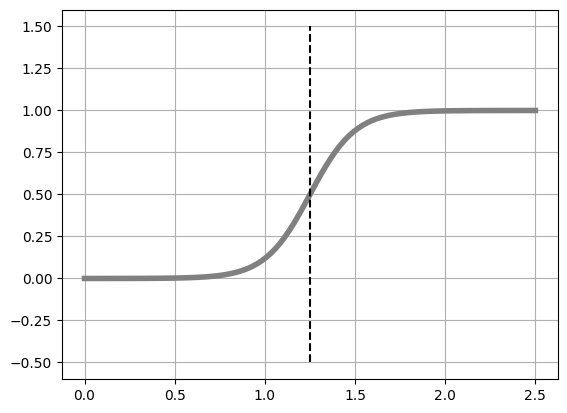

In [ ]:
# 로지스틱 회귀 모델 정의
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return y

def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color="gray", linewidth=4)

    # 결정 경계
    i = np.min(np.where(y>0.5)) # (A) i는 y가 0.5를 넘은 직후의 요소 번호
    B = (xb[i-1]+xb[i])/2 # (B) 0.5를 넘은 직후의 xb[i]와 직전의 xb[i-1]의 평균이 결정 경계의 근사치로 저장
    plt.plot([B, B], [-.5, 1.5], color="k", linestyle="--")
    plt.grid(True)
    return B

# test
W = [8, -10]
show_logistic(W)

### 6.1.5 교차 엔트로피 오차
로지스틱 회귀 모델을 통해 $x$가 $t=1$이 될 확률은
$$ y = σ(w_0x+w_1) = P(t=1|x) $$
- 데이터가 1개라고 가정, 무게 $x$에 대해 $t=1$일 시
    - $t=1$이 모델에서 생성될 확률: 로지스틱 회귀 모델 출력치 $y$
    - $t=0$이 모델에서 생성될 확률: $y-1$ <br>
- 클래스의 생성 확률
$$P(t|x)=y^t(1-y)^{1-t}$$
$t=1$의 경우
$$P(t=1|x) = y^1(1-y)^{1-1} = y$$
$t=0$의 경우
$$P(t=1|x)=y^0(1-y)^{1-0}=1-y$$
데이터가 $N$개일 시
    - 주어진 $\mathbf{X}=x_0, ⋯, x_{N-1}$에 대한 클래스 $\mathbf{T}=t_0, ⋯, t_{N-1}$의 생성 확률 > **가능도**
    $$P(\mathbf{T}|\mathbf{X})=\prod_{n=0}^{N-1}P(t_n|x_n)=\prod_{n=0}^{N-1}y_n^{t_n}(1-y_n)^{1-t_n}$$
    - 매개 변수 $w_0, w_1$은 로그 가능도가 최대가 되도록 구하기
    $$ \log P(\mathbf{T}|\mathbf{X})=\sum_{n=0}^{N-1}(t_n\log y_n+(1-t_n)\log(1-y_n))$$
    - 값이 최소가 되도록 매개 변수를 구해야 하므로 위의 식에 $-1$ 곱하기 > 교차 엔트로피 오차
    - $E(\mathbf{w})$: 교차 엔트로피를 $N$으로 나눈 평균 교차 엔트로피 오차
        - 데이터 개수에 오차 값이 영향을 덜 받음
        - 수치를 확인하기 편함
    $$ E(\mathbf{w}) = -\frac{1}{N}\log P(\mathbf{T}|\mathbf{X})=-\frac{1}{N}\sum_{n=0}^{N-1}(t_n\log y_n+(1-t_n)\log(1-y_n))$$

In [ ]:
# 평균 교차 엔트로피 오차
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1-t[n]) * np.log(1-y[n]))
    cee = cee/X_n
    return cee

# test
W = [1, 1]
cee_logistic(W, X, T)

1.0288191541851066

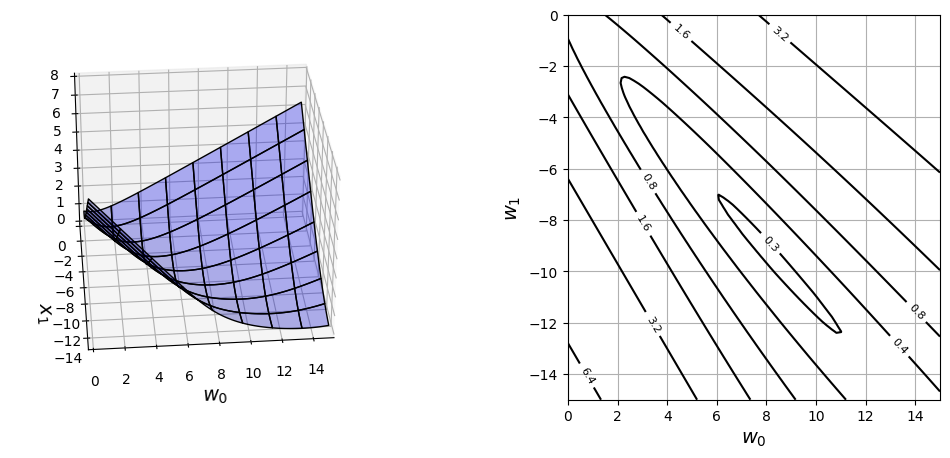

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 계산
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

# 표시
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(xx0, xx1, C, color="blue", edgecolor="black", rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel("$w_0$", fontsize=14)
ax.set_ylabel("$x_1$", fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors="black", levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt="%1.1f", fontsize=8)
plt.xlabel("$w_0$", fontsize=14)
plt.ylabel("$w_1$", fontsize=14)
plt.grid(True)
plt.show()

### 6.1.6 학습 규칙의 도출
$$ E(\mathbf{w}) = \frac{1}{N}\sum_{n=0}^{N-1}E_n(\mathbf{w}) $$
$$ E_n(\mathbf{w}) = -t_n\log y_n-(1-t_n)\log(1-y_n) $$
미분과 합은 교환할 수 있기에
$$\frac{∂}{∂w_0}E(\mathbf{w}) = \frac{1}{N}\frac{∂}{∂w_0}\sum_{n=0}^{N-1}E_n(\mathbf{w}) = \frac{1}{N}\sum_{n=0}^{N-1}\frac{\partial}{\partial w_0}E_n(\mathbf{w})$$

- $\frac{∂}{∂w_0}E_n(\mathbf{w})$를 구함 > 평균을 계산
- $E_n(\mathbf{w})$는 로지스틱 회귀 모델의 출력

$$ y_n = σ(a_n) = \frac{1}{1+\exp(-a_n)} $$
$$ a_n = w_0x_1 w_1 $$
$$ \frac{∂E_n}{∂y_n} = \frac{∂}{∂y_n}\{-t_n\log y_n-(1-t_n)\log(1-y_n)\} $$
$$ = -t_n\frac{∂}{∂y_n}\log y_n-(1-t_n)\frac{∂}{∂y_n}\log(1-y_n) $$
$$ \frac{∂y_n}{∂a_n} = \frac{∂}{∂a_n}σ(a_n) = σ(a_n)\{1-σ(a_n)\} = y_n(1-y_n) $$
$$ \frac{∂a_n}{∂w_0} = \frac{∂}{∂w_0}(w_0x_n+w_1)=x_n $$
$$ \frac{∂E_n}{∂w_0} = (-\frac{t_n}{y_n}+\frac{1-t_n}{1-y_n})y_n(1-y_n)x_n = \{-t_n(1-y_n)+(1-t_n)y_n\}x_n $$
$$ \frac{∂E}{∂w_0} = (y_n-t_n)x_n $$
$E$의 $w_0$에 대한 편미분
$$ \frac{∂E}{∂w_0} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n $$
$w_1$에 대한 편미분
$$ \frac{∂E}{∂w_1} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n) $$
$$ \frac{∂a_n}{∂w_1} = \frac{∂}{∂w_1}(w_0x_n + w_1) = 1 $$

In [ ]:
# 평균 교차 엔트로피 오차의 미분
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# test
W = [1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])


$w_0$ 방향의 편미분 값과 $w_1$ 방향의 편미분 값을 요소로 갖는 ndarray 배열

### 6.1.7 경사 하강법에 의한 해

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


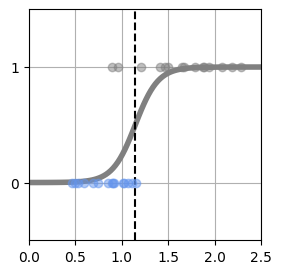

In [ ]:
from scipy.optimize import minimize

# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method="CG") # (A)
    return res1.x

# 메인
plt.figure(1, figsize=(3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

- 장점: $P(t=1|x)$의 조건부 확률을 근사, 모호성을 포함한 예측


## 6.2 2차원 입력 2클래스 분류
- 입력 데이터가 2차원인 경우로 확장한다면?

### 6.2.1 문제 설정

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(seed=1) # 난수 고정
N = 100 # 데이터 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시용
X_range1 = [-3, 3] # X1 범위 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4, 0.8, 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B) 생성한 난수가 Pi[0]보다 작으면 클래스 0, Pi[1]보다 작으면 클래스 1, Pi[2]보다 작으면 클래스 2
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

In [6]:
print(X[:5, :])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


입력 데이터 $\mathbf{X}$의 첫 5개

In [5]:
print(T2[:5, :])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


클래스 1, 0, 0, 1, 0에 속함

In [7]:
print(T3[:5, :])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


1-of-K 부호화: 목적 변수 벡터 $t_n$의 $k$번째 요소만 1로, 그 외에는 0으로 표기하는 방법

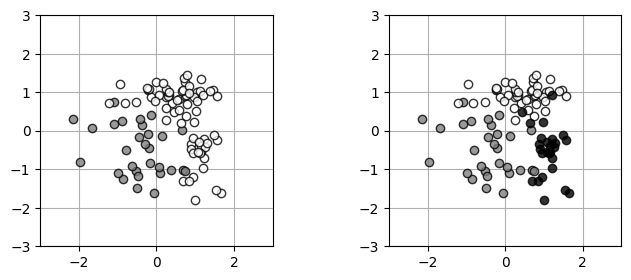

In [8]:
# 데이터 표시
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], linestyle="none", markeredgecolor="black", marker="o", color=c[k], alpha=0.8)
        plt.grid(True)

# 메인
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 6.2.2 로지스틱 회귀 모델
1차원 입력 버전
$$ y = σ(w_0x+w_1) = P(t=1|x) $$
에서 2차원 입력 버전으로 확장 가능
$$ y = σ(a)$$
$a$의 입력 총합은
$$ a = w_0x_0 + w_1x_1 + w_2$$
- 모델의 출력 $y$는 $P(t=0|\mathbf{x})$를 근사하는 것으로 함


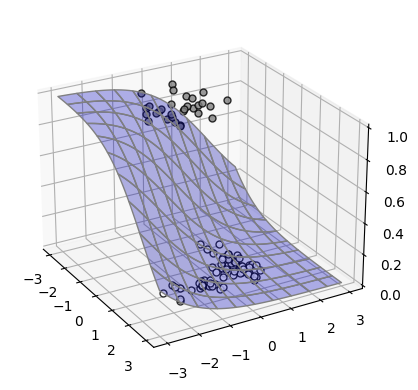

In [10]:
# 로지스틱 회귀 모델
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0]*x0 + w[1]*x1 + w[2])))
    return y

# 모델 3D 보기
from mpl_toolkits.mplot3d import Axes3D

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color="blue", edgecolor="gray", rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker="o", color=c[i], markeredgecolor="black", linestyle="none", markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)

# test
Ax = plt.subplot(1, 1, 1, projection="3d")
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

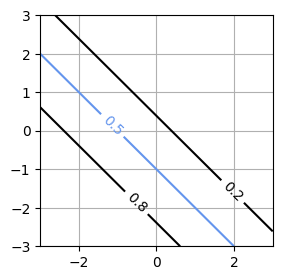

In [11]:
# 모델 등고선 2D 표시
def show_contour_logistic2(w):
    xn = 30 # 매개 변수 붆ㄹ 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8), colors=["k", "cornflowerblue", "k"])
    cont.clabel(fmt="%1.1f", fontsize=10)
    plt.grid(True)

# test
plt.figure(figsize=(3, 3))
W = [-1, -1, -1]
show_contour_logistic2(W)

- $W = [-1, -1, -1]$을 선택한 경우의 로지스틱 회귀 모델의 출력을 등고선으로 표시
- 모델의 평균 교차 엔트로피 오차 함수
$$ E(\mathbf{w}) = -\frac{1}{N}\log P(\mathbf{T|X}) = -1\frac{1}{N}\sum_{n=0}^{N-1}\{t_n\log y_n+(1-t_n)\log(1-y_n)\} $$
- 데이터베이스에는 1-of-K 부호화 사용

In [12]:
# 크로스 엔트로피 오차
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0]*np.log(y[n]) + (1-t[n, 0])*np.log(1-y[n]))
        cee = cee / X_n
        return cee

-매개 변수의 편미분을 구할 시 다음과 같은 식이 나옴
$$ \frac{∂E}{∂w_0} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_0 $$
$$ \frac{∂E}{∂w_1} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_1 $$
$$ \frac{∂E}{∂w_2} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n) $$

In [13]:
# 크로스 엔트로피 오차의 미분
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee

# test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

$\mathbf{W}=[-1, -1, -1$의 경우 편미분값의 반환

w0 = -3.75, w1=-2.58, w2=-0.27
CEE = 0.00


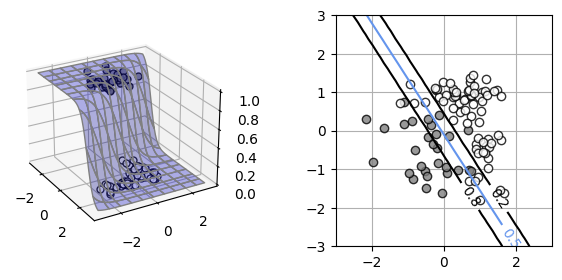

In [16]:
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 검색
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t), jac=dcee_logistic2, method="CG")
    return res.x

# 메인
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection="3d")
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1={1:.2f}, w2={2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

- 평균 교차 엔트로피 오차가 최소가 되도록 > 로지스틱 회귀 모델 매개 변수 구함
- 분포를 분리하는 곳에서 결정 경계가 그려짐
- 로지스틱 회귀 모델의 시그모이드 함수: 면 모델 > 결정 경계는 직선이 됨


## 6.3 2차원 입력 3클래스 분류
### 6.3.1 3클래스 분류 로지스틱 회귀 모델
- 3클래스 이상의 클래스 분류에 대응 가능


- 3개의 클래스에 대응하는 입력 총합 $a_k(k=0, 1, 2)$를 고려
$$ a_k = w_{k1}x_0 + w_{k1}x_1 + w_{k2} \quad (k=0, 1, 2) $$
- $w_{ki}$ > 입력 $x_i$에서 클래서 $k$의 입력 총합을 조절하는 매개 변수
$$ a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}x_2 = \sum_{i=0}^Dw_{ki}x_i \quad (k=0, 1, 2) $$
- 입력 총합 지수 함수 $\exp(a_k)$를 고려, 지수 함수를 모든 클래스에 합한 것을 $u$
$$ u = \exp(a_0) + \exp(a_1) + \exp(a_2) = \sum_{k=0}^{K-1}\exp(a_k) $$
- $K$는 분류할 클래스의 수 (현재는 $K=3$)
- 소프트맥스 함수 출력
$$ y_k = \frac{\exp(a_k)}{u} \quad (k = 0, 1, 2) $$
- 모델 출력 $y_0, y_1, y_2$: 각 클래스에 입력 $x$가 속할 확률을 나타내도록 학습

In [17]:
# 3클래스용 로지스틱 회귀 모델
def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0]*x0 + w[k, 1]*x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

# test
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


### 6.3.2 교차 엔트로피 오차
- 가능도: 모든 입력 데이터 $\mathbf{x}$에 대해서 전체 클래스 데이터 $\mathbf{T}$가 생성된 확률
- 한 입력 데이터 $x$에 대해 클래스가 0인 경우 클래스가 생성된 확률
$$ P(\mathbf{T}=[1, 0, 0]|\mathbf{X}) = y_0 $$
- 클래스가 1인 확률
$$P(\mathbf{T}=[0, 1, 0]|\mathbf{X}) = y_1$$
- 일반화 시
$$ P(\mathbf{T}|\mathbf{X}) = y_0^{t_0}y_1^{t_1}y_2^{t_2} $$
- 모든 $N$개의 데이터가 생성된 확률
$$ P(\mathbf{T}|\mathbf{X}) = \prod_{n=0}^{N-1}P(t_n|\mathbf{x}_n) = \prod_{n=0}^{N-1}y_{n0}^{t_{n0}}y_{n1}^{t_{n1}}y_{n2}^{t_{n2}} = \prod_{n=0}^{N-1}\prod{k=0}^{K-1}y_{nk}^{t_{nk}} $$
- 평균 교차 엔트로피 오차 함수 = 기능도의 음의 대수의 평균
$$ E(\mathbf{W}) = -\frac{1}{N}\log P(\mathbf{T}|\mathbf{X}) = -\frac{1}{N}\sum_{n=0}^{N-1}P(t_n|x_n) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}\log y_{nk} $$

In [18]:
# 교차 엔트로피 오차
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k]*np.log(y[n, k]))
    cee = cee / X_n
    return cee

# test
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288


### 6.3.3 경사 하강법에 의한 해
$E(\mathbf{W})$를 최소화하는 $\mathbf{W}$를 구하기 > $E(\mathbf{W})$의 각 $w_{ki}$에 대한 편미분 필요
$$ \frac{∂E}{∂w_{ki}} = \frac{1}{N}\sum_{n=0}^{N-1}(y_{nk}-t_{nk})x_i $$

In [20]:
# 교차 엔트로피 오차의 미분
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) * (x의 차원 D+!)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k]) * np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# test
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])


$\frac{∂E}{∂w_{ki}}$에 대응한 요소 수 9개의 배열

In [26]:
# 매개 변수 검색
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),jac=dcee_logistic3, method="CG")
    return res.x

# 모델 등고선 2D 표시
def show_contour_logistic3(w):
    xn = 30 # 매개 변수 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j], levels=(0.5, 0.9), colors=["cornflowerblue", "k"])
        cont.clabel(fmt="%1.1f", fontsize=9)
    plt.grid(True)

<ipython-input-26-9ecd50e12669>:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(cee_logistic3, w_init, args=(x, t),jac=dcee_logistic3, method="CG")


[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


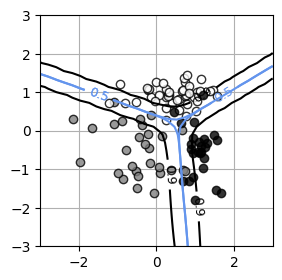

In [27]:
# 메인
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)), 2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()